In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition


import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

Ejercicio: conceptual

    Generar una muestra de vectores aleatorios de tamaño 20 con distrbución 𝑁2(𝜇,Σ),

con 𝜇=𝑐(0,0) y Σ=𝐼2.

¿Quiénes son las componentes principales?

In [2]:
mean = (0,0)
cov = np.diag((1,1))
df = np.random.multivariate_normal(mean, cov = cov, size = 1000)
pca = decomposition.PCA()

df_transformado_pca=pca.fit_transform(df)

pca.explained_variance_ #eigenvalues (varianza de cada componentes)

array([1.0860315 , 0.98224246])

In [3]:
pca.components_ #eigenvectors/autovectores (vectores ortogonales donde transformo)

array([[ 0.99961828, -0.02762784],
       [-0.02762784, -0.99961828]])

Las componentes principales en este caso serian por ejemplo los autovectores (1,0) y (0,1) (uno de los muchos, sklearn nos devuelve ([ 0.667358  , -0.74473707],[-0.74473707, -0.667358  ]]))

## Generar una muestra como la anterior, pero utilizar Σ= ([[2, 1.2],[1.2, 1]])).

In [4]:
mean_2 = (0,0)
cov_2 = np.matrix([[2, 1.2],[1.2, 1]])
df_2 = np.random.multivariate_normal(mean, cov = cov_2, size = 500)
pca_2 = decomposition.PCA()

df_transformado_pca_2=pca_2.fit_transform(df_2)

pca_2.explained_variance_ #eigenvalues (varianza de cada componentes)

array([2.65274127, 0.18855868])

## Calcular los autovectores de Σ y dar las componentes muestrales. 

In [5]:
pca_2.components_ #eigenvectors/autovectores (vectores ortogonales donde transformo)

array([[-0.83308159, -0.55315012],
       [ 0.55315012, -0.83308159]])

## graficar los datos y los autovectores. 

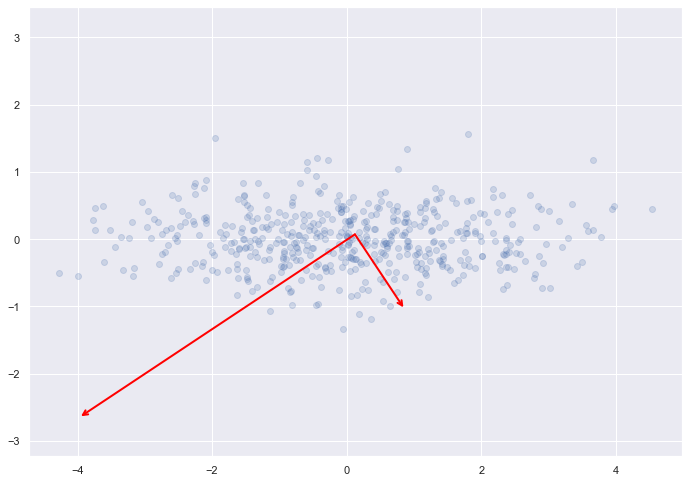

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color = "red")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(df_transformado_pca_2[:, 0], df_transformado_pca_2[:, 1], alpha=0.2)
for length, vector in zip(pca_2.explained_variance_, pca_2.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_2.mean_, pca_2.mean_ + v)
    
plt.axis('equal');

### Añadir al mismo gráfico los datos proyectados en el primer componente y proyectados a las segunda componente (sugerencia: usar la funcion eigen).

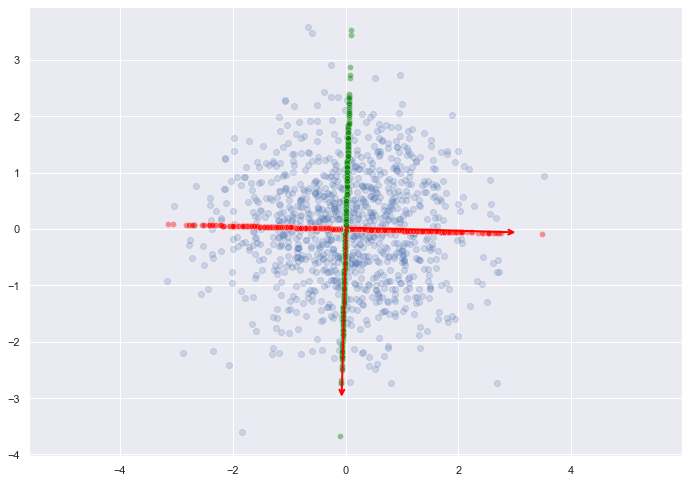

In [7]:
import copy

t = pca.fit_transform(df)

# plot data
plt.scatter(df[:, 0], df[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * 1
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

t_1=copy.deepcopy(t)
t_1[:,1]=0
primera_proyeccion = np.dot(t_1.reshape(1000,2), pca.components_.T)

t[:, 0] = 0
segunda_proyeccion = np.dot(t.reshape(1000,2), pca.components_.T)


sns.scatterplot(x=primera_proyeccion[:,0], 
                y=primera_proyeccion[:,1], 
                color='red', 
                alpha=.4)
sns.scatterplot(x=segunda_proyeccion[:,0], 
                y=segunda_proyeccion[:,1], 
                color='green', 
                alpha=.4);

### Generar una muestra aleatoria de tamaño 50 con matriz de covarianza diagonal tal que el primer autovector se corresponda con el 90% de variabilidad de la muestra medida como la traza de sigma. Una vez logrado el primer objetivo poner un outlier en la dirección del segundo autovector y calcular las pca.

In [8]:
from sklearn.preprocessing import StandardScaler

mean_3 = (0,0)
cov_3 = np.matrix([[10,1],[1,0.15]])
muestra = np.random.multivariate_normal(mean_3, cov = cov_3, size = 500)

PCA = decomposition.PCA()

PCA.fit(StandardScaler().fit_transform(muestra))
PCA.explained_variance_ratio_

array([0.91060658, 0.08939342])

In [9]:
outlier=PCA.components_[1]*1000000000000000000000
muestra_outlier = pd.concat([pd.DataFrame(muestra), pd.DataFrame(outlier.reshape(1,2))]).reset_index(drop = True)

PCA_outlier = decomposition.PCA()
muestra_outlier_scaled = StandardScaler().fit_transform(muestra_outlier)

PCA_outlier.fit(muestra_outlier_scaled);

In [10]:
# COMPONENTES PRINCIPALES CON OUTLIER
PCA_outlier.components_

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

In [11]:
# COMPONENTES PRINCIPALES SIN OUTLIER
PCA.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Si bien nosotros generamos una muestra donde el 90% de la variabilidad estaba en la direccion [-0.70710678, -0.70710678], y un 10% en la direccion [-0.70710678,  0.70710678], luego de insertar un outlier en la direccion del PCA2, obtenemos que la direccion que tiene mayor variabilidad ahora es [-0.70710678,  0.70710678], la cual coincide con la que antes teniamos solo un 10%. Esto se debe a que obtener la direccion con la mayor cantidad de variabilidad, es similar al calculo de minimizar RSS, donde un outlier va a tener un valor de residuo muy alto y por tanto me va a perjudicar arrastrando todo hacia el. El outlier puesto en la direccion de la segunda componente, arrastra a PCA, a pensar que esa es la direccion donde obtiene maxima variabilidad, cuando no es sinonimo de informacion en este caso. Por eso hay que tener cuidado con los outliers al aplicar PCA.


## Ejercicio: reducción de dimensión 1

Utilizar las componentes principales como técnica de reducción de dimensión algún conjunto de datos que utilizaron en Aprendizaje Supervisado. Hacer un ligero análisis y combinar con una técnica de clasificación. Comparar con la misma técnica sin utilizar la reducción. Sugerencia: si utilizó un algoritmo muy complicado, es preferible que baje un poco la complejidad para poder comparar razonablemente.


In [33]:
from sklearn.mixture import GaussianMixture

trees = pd.read_csv("trees.csv", sep = " ")

PCA_trees = decomposition.PCA()

trees_scaled = StandardScaler().fit_transform(trees)


k = 5
list_bic = []

for n_cluster in np.arange(1,k):
    clf = GaussianMixture(n_components=n_cluster, n_init=50,covariance_type= "full", random_state=42).fit(trees_scaled)
    list_bic.append(clf.bic(trees_scaled))
best_cant_clusters = np.argmin(list_bic)+1

best_gmm = GaussianMixture(n_components=best_cant_clusters, n_init=50, random_state=42).fit(trees_scaled)



trees_pca = pd.DataFrame(PCA_trees.fit_transform(trees_scaled))

trees_pca["label"]=best_gmm.predict(trees_scaled)

PCA_trees.explained_variance_ratio_



array([0.80343332, 0.18720578, 0.0093609 ])

In [34]:
PCA_trees.components_

array([[ 0.60857049,  0.48912674,  0.62481757],
       [ 0.40990128, -0.8680065 ,  0.28025999],
       [-0.67942837, -0.08555556,  0.72873681]])

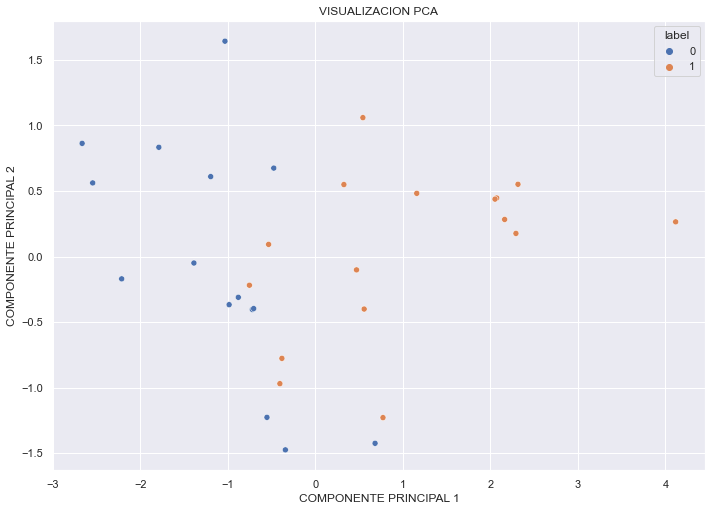

In [38]:
# Vamos a graficar ahora, en la base de las componentes principales generadas

sns.scatterplot(data = trees_pca, x = trees_pca.iloc[:,0], y = trees_pca.iloc[:,1], hue = "label")
plt.title("VISUALIZACION PCA")
plt.xlabel("COMPONENTE PRINCIPAL 1")
plt.ylabel("COMPONENTE PRINCIPAL 2");

## Ejercicio: reducción de dimensión 2

Para los datasets que estuvimos trabajando utilizar PCA para poder dibujar. Recuerde que reducir la dimensión puede ser una buena forma de visualizar los clusters.


In [55]:
usa=pd.read_csv("usArrest.csv")

usa_scaled = StandardScaler().fit_transform(usa.iloc[:,1:])

PCA_usa = decomposition.PCA()

k = 10
list_bic = []

for n_cluster in np.arange(1,k):
    clf = GaussianMixture(n_components=n_cluster, n_init=50,covariance_type= "full", random_state=42).fit(usa_scaled)
    list_bic.append(clf.bic(usa_scaled))
best_cant_clusters = np.argmin(list_bic)+1

best_gmm_usa = GaussianMixture(n_components=best_cant_clusters, n_init=50, random_state=42).fit(usa_scaled)


usa_scaled_PCA = pd.DataFrame(PCA_usa.fit_transform(usa_scaled))

usa_scaled_PCA["label"]=best_gmm_usa.predict(usa_scaled)

PCA_usa.explained_variance_ratio_ # El 86% de la varianza del dataset esta contenida en las primeras 2 componentes principales

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

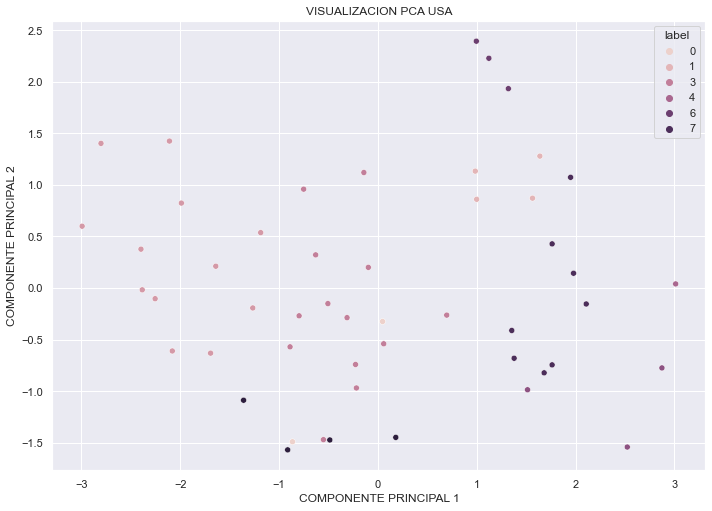

In [56]:
sns.scatterplot(data =usa_scaled_PCA ,x = usa_scaled_PCA.iloc[:,0], y = usa_scaled_PCA.iloc[:,1], hue = "label")
plt.title("VISUALIZACION PCA USA")
plt.xlabel("COMPONENTE PRINCIPAL 1")
plt.ylabel("COMPONENTE PRINCIPAL 2");

In [60]:
mall=pd.read_csv("Mall_Customers.csv")

mall_scaled = StandardScaler().fit_transform(mall.iloc[:,2:])

PCA_mall = decomposition.PCA()

k = 10
list_bic = []

for n_cluster in np.arange(1,k):
    clf = GaussianMixture(n_components=n_cluster, n_init=50,covariance_type= "full", random_state=42).fit(mall_scaled)
    list_bic.append(clf.bic(mall_scaled))
best_cant_clusters = np.argmin(list_bic)+1

best_gmm_mall = GaussianMixture(n_components=best_cant_clusters, n_init=50, random_state=42).fit(mall_scaled)



mall_scaled_PCA = pd.DataFrame(PCA_mall.fit_transform(mall_scaled))

mall_scaled_PCA["label"]=best_gmm_mall.predict(mall_scaled)

PCA_mall.explained_variance_ratio_ 
# El 77% de la varianza del dataset esta contenida en las primeras 2 componentes principales

array([0.44266167, 0.33308378, 0.22425454])

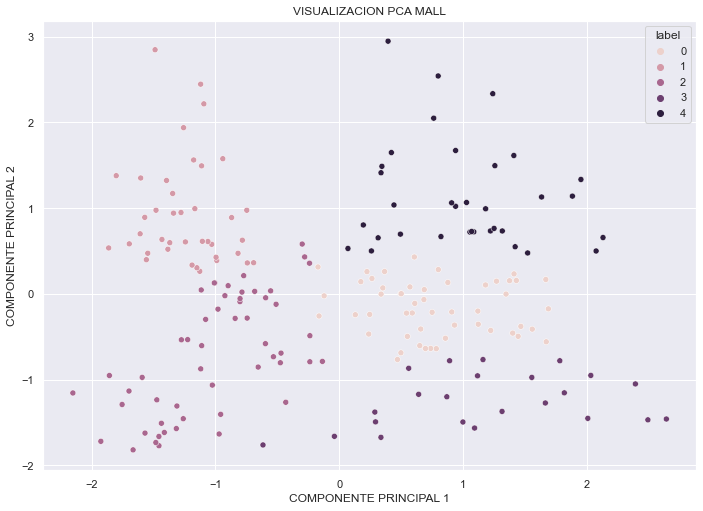

In [61]:
sns.scatterplot(data = mall_scaled_PCA,x = mall_scaled_PCA.iloc[:,0], y = mall_scaled_PCA.iloc[:,1], hue = "label")
plt.title("VISUALIZACION PCA MALL")
plt.xlabel("COMPONENTE PRINCIPAL 1")
plt.ylabel("COMPONENTE PRINCIPAL 2");

Observamos una segmentacion de clientes, la cual logramos visualizar bajando su dimension a r2 con PCA

## Ejercicio: reducción de dimensión 3

Hacer un análisis de reducción de dimensión al conjunto de datos sat.csv.


In [67]:
sat = pd.read_csv("sat.csv")
df_sat = sat.copy()
df_sat_scaled = StandardScaler().fit_transform(df_sat.iloc[:,1:])


PCA_sat = decomposition.PCA()


k = 5
list_bic = []

for n_cluster in np.arange(1,k):
    clf = GaussianMixture(n_components=n_cluster, n_init=50,covariance_type= "full", random_state=42).fit(df_sat_scaled)
    list_bic.append(clf.bic(df_sat_scaled))
best_cant_clusters = np.argmin(list_bic)+1

best_gmm_sat = GaussianMixture(n_components=best_cant_clusters, n_init=50, random_state=42).fit(df_sat_scaled)


df_sat_scaled_pca=pd.DataFrame(PCA_sat.fit_transform(df_sat_scaled))

df_sat_scaled_pca["label"]=best_gmm_sat.predict(df_sat_scaled)

PCA_sat.components_ # Componentes principales
PCA_sat.explained_variance_ratio_.round(2) # Varianza capturada en cada componente principal
# Las primeras 2 componentes contienen el 83% de la varianza de todo el dataset

array([0.64, 0.19, 0.14, 0.01, 0.01, 0.  , 0.  ])

In [65]:
best_cant_clusters

3

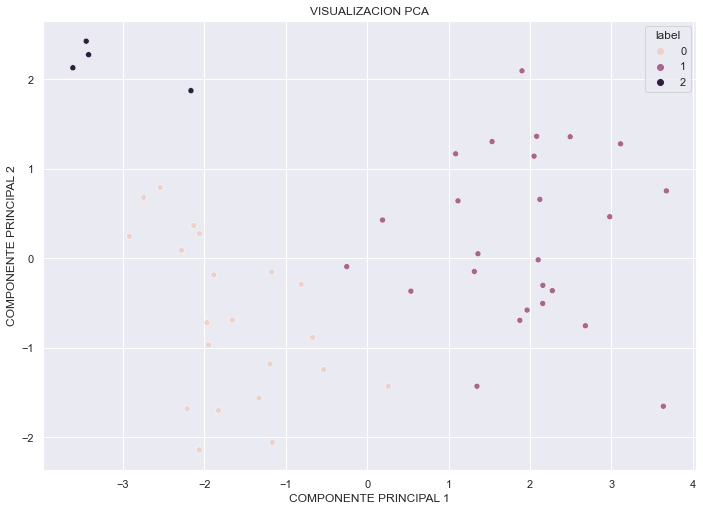

In [68]:
sns.scatterplot(data = df_sat_scaled_pca, x = df_sat_scaled_pca.iloc[:,0], y = df_sat_scaled_pca.iloc[:,1], hue = "label")
plt.title("VISUALIZACION PCA")
plt.xlabel("COMPONENTE PRINCIPAL 1")
plt.ylabel("COMPONENTE PRINCIPAL 2");